In [15]:
from mycnn import LeNet5
import tensorflow as tf
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# reshape 784 to 28x28x1
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# pad image from 28x28x1 to 32x32x1
x_train = np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)))
x_test = np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)))
print(x_train.shape)
print(x_test.shape)

# convert to float and normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

# one-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

(60000, 32, 32, 1)
(10000, 32, 32, 1)


In [3]:
lenet5 = LeNet5()
lenet5.summary()

Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120   

In [4]:
lenet5.setup_training(
    logdir='log_lenet5',
    epochs=10,
    batch_size=100,
    optimizer=tf.keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

******************************
Loading last checkpoint...
Start traing from epoch 10
******************************
checkpoint_path : log_lenet5\weights
best_checkpoint : log_lenet5\weights.h5
epochs          : 10
initial_epoch   : 10
batch_size      : 100
optimizer       : <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x00000206A624FA08>
loss            : categorical_crossentropy
metrics         : ['accuracy']


In [5]:
lenet5.train(x_train[:50000], y_train[:50000], x_train[50000:], y_train[50000:])

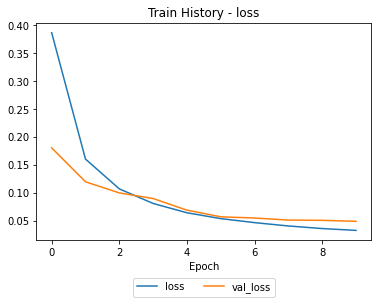

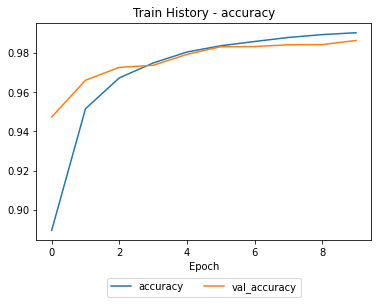

In [6]:
lenet5.show_history(["loss", "accuracy"])

In [7]:
lenet5.evaluate(x_test, y_test)

100/100 [==============================] - 2s 5ms/step - loss: 0.0532 - accuracy: 0.9809


[0.04442181810736656, 0.984499990940094]

In [17]:
pr_score = lenet5.predict(x_test)
pr_label = pr_score.argmax(axis=-1)
gt_label = y_test.argmax(axis=-1)
print(classification_report(gt_label, pr_label))
confusion_matrix(gt_label, pr_label)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



array([[ 969,    0,    1,    0,    0,    3,    3,    2,    2,    0],
       [   0, 1123,    1,    1,    0,    1,    2,    2,    5,    0],
       [   2,    2, 1021,    2,    1,    0,    0,    2,    2,    0],
       [   0,    0,    0, 1001,    0,    4,    0,    1,    2,    2],
       [   1,    0,    3,    0,  967,    0,    3,    1,    0,    7],
       [   1,    0,    0,    5,    0,  883,    1,    1,    1,    0],
       [   6,    2,    1,    1,    1,    4,  940,    0,    3,    0],
       [   0,    0,    6,    6,    0,    0,    0, 1014,    0,    2],
       [   4,    0,    2,   10,    2,    3,    0,    3,  949,    1],
       [   1,    1,    1,    5,    9,    3,    1,    7,    3,  978]],
      dtype=int64)